In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('20170308HUNDEHALTER.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HALTER_ID         7155 non-null   int64  
 1   ALTER             7154 non-null   object 
 2   GESCHLECHT        7155 non-null   object 
 3   STADTKREIS        7154 non-null   float64
 4   STADTQUARTIER     7154 non-null   float64
 5   RASSE1            7155 non-null   object 
 6   RASSE1_MISCHLING  618 non-null    object 
 7   RASSE2            543 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   RASSENTYP         7155 non-null   object 
 10  GEBURTSJAHR_HUND  7155 non-null   int64  
 11  GESCHLECHT_HUND   7155 non-null   object 
 12  HUNDEFARBE        7155 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 726.8+ KB


In [19]:
df.columns
df.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


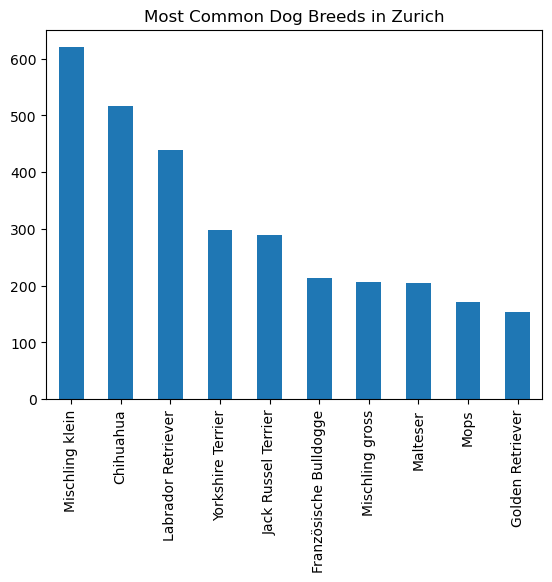

In [20]:
top_breeds = df['RASSE1'].value_counts().head(10)
top_breeds.plot(kind='bar', title='Most Common Dog Breeds in Zurich')

plt.show()

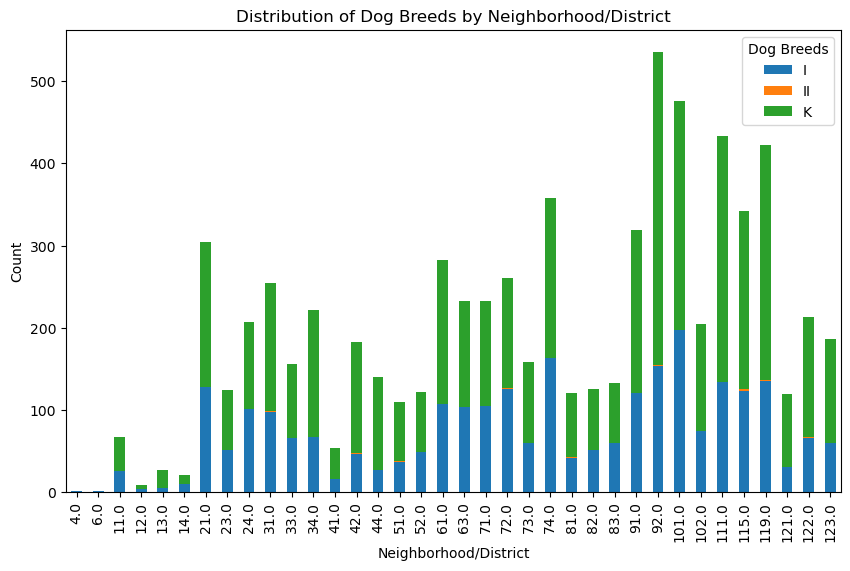

In [21]:
breeds_by_district = df.groupby('STADTQUARTIER')['RASSENTYP'].value_counts()
breeds_by_district.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Dog Breeds by Neighborhood/District')
plt.legend(title='Dog Breeds')
plt.xlabel('Neighborhood/District')
plt.ylabel('Count')

plt.show()

In [22]:
df.columns 

Index(['HALTER_ID', 'ALTER', 'GESCHLECHT', 'STADTKREIS', 'STADTQUARTIER',
       'RASSE1', 'RASSE1_MISCHLING', 'RASSE2', 'RASSE2_MISCHLING', 'RASSENTYP',
       'GEBURTSJAHR_HUND', 'GESCHLECHT_HUND', 'HUNDEFARBE'],
      dtype='object')

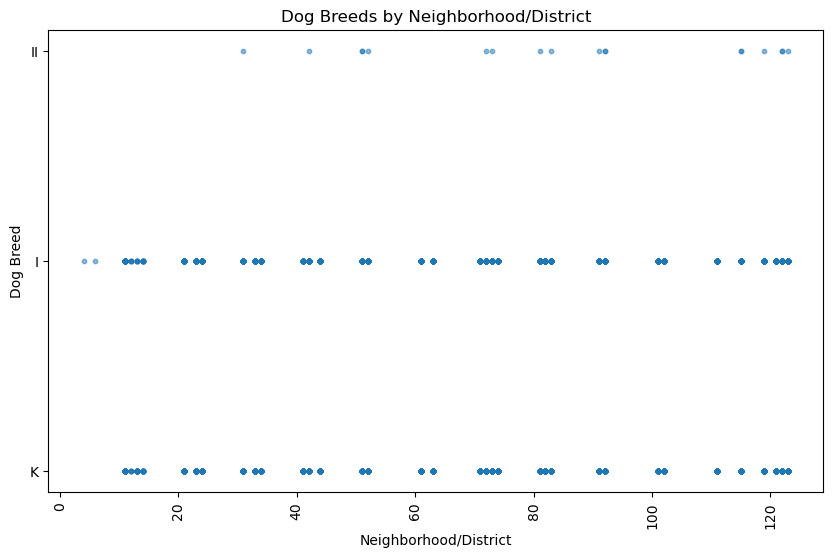

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['STADTQUARTIER'], df['RASSENTYP'], s=10, alpha=0.5)
plt.title('Dog Breeds by Neighborhood/District')
plt.xlabel('Neighborhood/District')
plt.ylabel('Dog Breed')
plt.xticks(rotation=90)
plt.show()

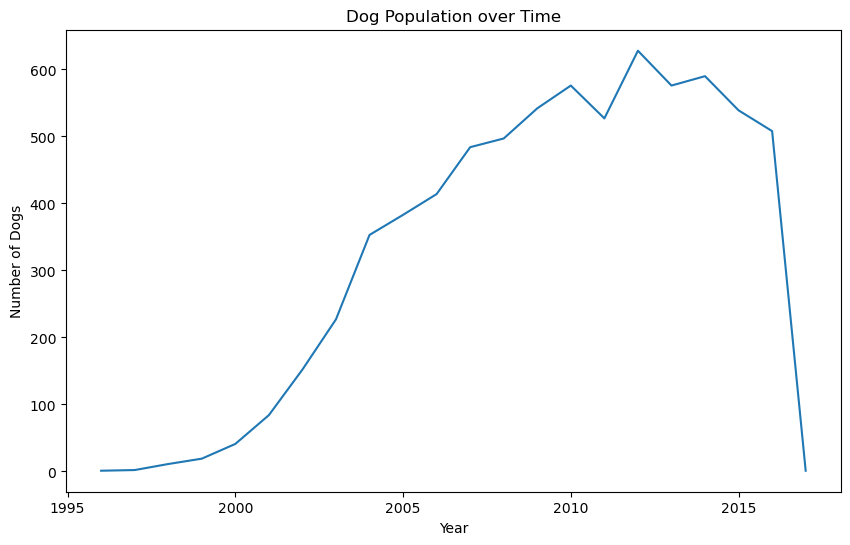

In [26]:
# Convert 'GEBURTSJAHR_HUND' column to datetime
df['GEBURTSJAHR_HUND'] = pd.to_datetime(df['GEBURTSJAHR_HUND'], format='%Y')

# Group the data by year and count the number of dogs in each year
year_counts = df.groupby(df['GEBURTSJAHR_HUND'].dt.year)['HALTER_ID'].count()

# Create a time-series plot of dog population over time
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values)
plt.title('Dog Population over Time')
plt.xlabel('Year')
plt.ylabel('Number of Dogs')
plt.show()

C:\Users\snewaz\AppData\Local\Temp\ipykernel_28796\787202978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


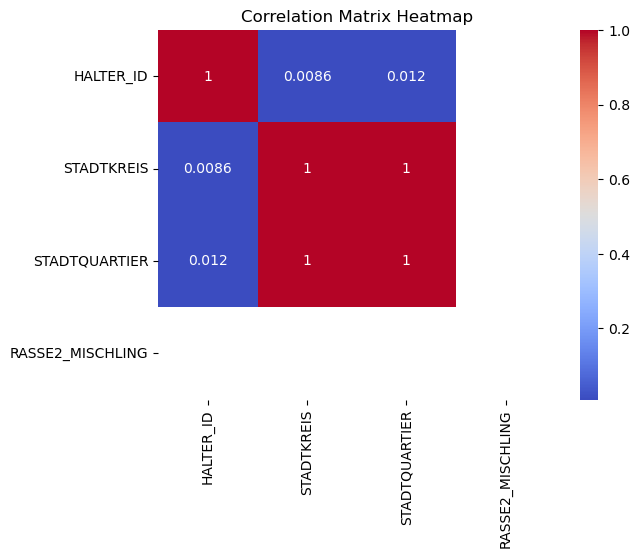

In [28]:
import seaborn as sns
corr = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Set the title and display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

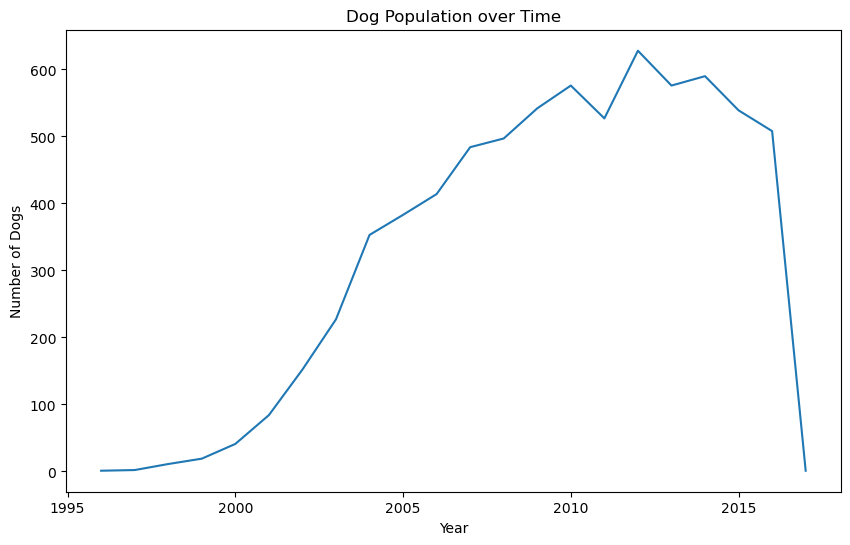

In [33]:
# Convert Geburtsdatum Hund to datetime format
df['GEBURTSJAHR_HUND'] = pd.to_datetime(df['GEBURTSJAHR_HUND'], format='%Y')

# Group the data by year and count the number of dogs in each year
year_counts = df.groupby(df['GEBURTSJAHR_HUND'].dt.year)['HALTER_ID'].count()

# Create a time-series plot of dog population over time
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values)
plt.title('Dog Population over Time')
plt.xlabel('Year')
plt.ylabel('Number of Dogs')
plt.show()
